<a href="https://colab.research.google.com/github/souzajvp/educational/blob/main/An%C3%A1lises-geoespaciais/Primeiros-passos-geopandas/Vacina%C3%A7%C3%A3o_contra_COVID_19_no_Paran%C3%A1_Uma_an%C3%A1lise_geoespacial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação do geopandas
Precisamos fazer a instalação pois essa biblioteca não vem instalada nos notebooks do Colab

In [1]:
!pip install geopandas

Importando as bibliotecas

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

Neste exemplo vamos trabalhar com 2 conjuntos de dados:
1. Shapefile dos municípios do Paraná - extraído do site do [IBGE](https://github.com/souzajvp/educational/blob/main/An%C3%A1lises-geoespaciais/Primeiros-passos-geopandas/Preparando_os_dados_para_an%C3%A1lise.ipynb);
2. Banco de dados com informações populacionais e de vacinação do estado do Paraná;
> Você pode encontrar uma descrição dos passos necessários para preparar o banco de dados neste [Notebook](https://github.com/souzajvp/educational/blob/main/An%C3%A1lises-geoespaciais/Primeiros-passos-geopandas/Preparando_os_dados_para_an%C3%A1lise.ipynb).

1. Lendo o shapefile

Obs: Neste caso, estou lendo o arquivo do meu Google Drive, mas você pode baixar o arquivo compactado do meu [GitHub](https://github.com/souzajvp/educational/blob/main/An%C3%A1lises-geoespaciais/Primeiros-passos-geopandas/PR_Municipios_2020.zip)

In [3]:
pr_municipios = gpd.read_file('/content/drive/MyDrive/geopandas/parana/Municípios/PR_Municipios_2020.shp')

## A estrutura de um GeoDataFrame
Quando usamos o **geopandas** para ler um arquivo `.shp`, é criado um GeoDataFrame. Basicamente, esse GeoDataFrame é um DataFrame do pandas com uma modificação: ele contém por padrão uma coluna chamada `geometry`, que armazena as informações geográficas do arquivo.

Podemos visualizar essa estrutura abaixo

In [4]:
pr_municipios.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry
0,4100103,Abatiá,PR,228.717,"POLYGON ((-50.22465 -23.22603, -50.22561 -23.2..."
1,4100202,Adrianópolis,PR,1349.311,"POLYGON ((-48.99969 -24.63712, -48.99927 -24.6..."
2,4100301,Agudos do Sul,PR,192.261,"POLYGON ((-49.30433 -25.94769, -49.30541 -25.9..."
3,4100400,Almirante Tamandaré,PR,194.888,"POLYGON ((-49.28261 -25.22827, -49.28076 -25.2..."
4,4100459,Altamira do Paraná,PR,386.945,"POLYGON ((-52.81511 -24.71726, -52.80995 -24.7..."


Note que temos outras colunas, que se comportam com Series do pandas. De modo similar ao que se faz no pandas, podemos adicionar colunas, realizar merge, filtrar os bancos com `query` e muito mais.

Após ler os dados do shapefile do Paraná, podemos plotar o mapa.

Obs: podemos usar o pacote matplotlib para estilizar o mapa

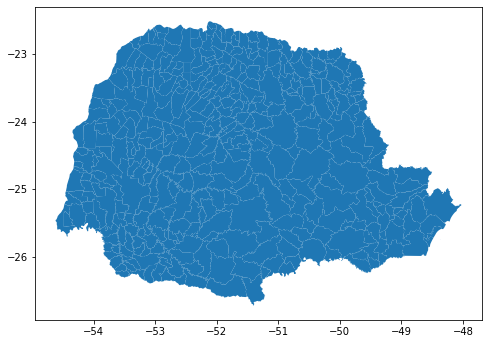

In [5]:
fig, ax = plt.subplots(figsize=(8,8))
pr_municipios.plot(ax=ax)

Para visualizar mais uma possibilidade do geopandas, vamos plotar os municípios do PR e especificar que queremos um esquema de cores baseado na columa `AREA_KM2`

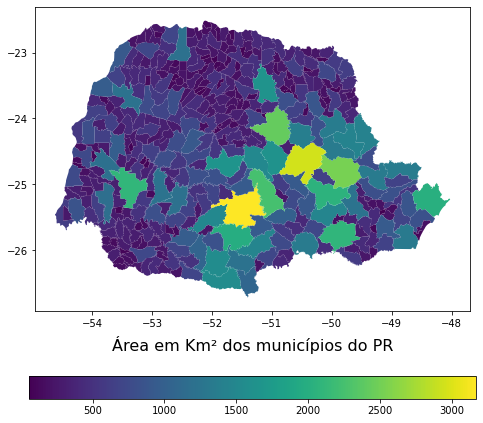

In [6]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_title('Área em Km² dos municípios do PR', fontsize=16, y=-0.15)
pr_municipios.plot(ax=ax, column='AREA_KM2', legend=True, 
                   legend_kwds={'orientation': "horizontal"});

Para enriquecer nossa análise, vamos carregar informações populacionais do PR e dados de vacinação de COVID-19

In [7]:
import pandas as pd

In [8]:
url = 'https://raw.githubusercontent.com/souzajvp/educational/main/An%C3%A1lises-geoespaciais/Primeiros-passos-geopandas/vacinacao_populacao_parana.csv'
vac_pr = pd.read_csv(url)

In [9]:
vac_pr.head()

,Cód. IBGE,Doses Aplicadas,Dose 1,Dose 2,Doses_janssen,Imunizados,POP_2010,ID_MUN_RES,MUNICIPIO,P_Comp_Imun,P_Parc_Imun
0,410010,5211,4116,1095,63.0,1158.0,7764,410010,Abatiá,14.914992,53.013910
1,410020,4399,3027,1372,75.0,1447.0,6376,410020,Adrianópolis,22.694479,47.474906
2,410030,5518,4516,1002,454.0,1456.0,8270,410030,Agudos do Sul,17.605804,54.607013
3,410040,45383,37225,8158,3383.0,11541.0,103204,410040,Almirante Tamandaré,11.182706,36.069338
4,410045,1974,1559,415,30.0,445.0,4306,410045,Altamira do Paraná,10.334417,36.205295


In [10]:
# Modificando os tipos das variáveis para realizar o merge
pr_municipios['Cód. IBGE'] = pr_municipios['CD_MUN'].astype(str).str[:6]

vac_pr['Cód. IBGE'] = vac_pr['Cód. IBGE'].astype(str)

Graças à compatibilidade entre os GeoDataFrames (geopandas) e DataFrames (pandas) podemos fazer uma junção (merge) das informações dos bancos e agregar informações aos dados geográficos.

In [11]:
shape_completo = pr_municipios.merge(vac_pr, on='Cód. IBGE')
shape_completo.head()

,CD_MUN,NM_MUN,SIGLA_UF,AREA_KM2,geometry,Cód. IBGE,Doses Aplicadas,Dose 1,Dose 2,Doses_janssen,Imunizados,POP_2010,ID_MUN_RES,MUNICIPIO,P_Comp_Imun,P_Parc_Imun
0,4100103,Abatiá,PR,228.717,"POLYGON ((-50.22465 -23.22603, -50.22561 -23.2...",410010,5211,4116,1095,63.0,1158.0,7764,410010,Abatiá,14.914992,53.013910
1,4100202,Adrianópolis,PR,1349.311,"POLYGON ((-48.99969 -24.63712, -48.99927 -24.6...",410020,4399,3027,1372,75.0,1447.0,6376,410020,Adrianópolis,22.694479,47.474906
2,4100301,Agudos do Sul,PR,192.261,"POLYGON ((-49.30433 -25.94769, -49.30541 -25.9...",410030,5518,4516,1002,454.0,1456.0,8270,410030,Agudos do Sul,17.605804,54.607013
3,4100400,Almirante Tamandaré,PR,194.888,"POLYGON ((-49.28261 -25.22827, -49.28076 -25.2...",410040,45383,37225,8158,3383.0,11541.0,103204,410040,Almirante Tamandaré,11.182706,36.069338
4,4100459,Altamira do Paraná,PR,386.945,"POLYGON ((-52.81511 -24.71726, -52.80995 -24.7...",410045,1974,1559,415,30.0,445.0,4306,410045,Altamira do Paraná,10.334417,36.205295


Agora podemos gerar visualizações de acordo com o percentual de vacinação dos municípios. Pra gerar o mapa abaixo, calculei a média do percentual dos habitantes com vacinação completa no estado do Paraná.
>Lembrando que esquema de  vacinação completo compreende duas doses das vacinas do Butantan, Astrazeneca e Pfizer ou dose única da Janssen.

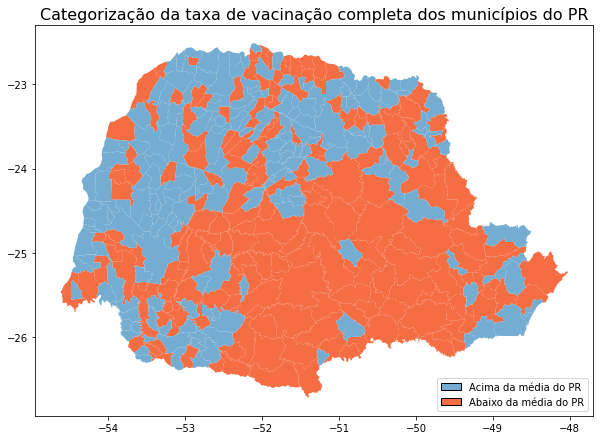

In [12]:
# Média de vacinação completa no estado
media = shape_completo['P_Comp_Imun'].mean()
# Lista de municípios abaixo da média
menor_media = (shape_completo['P_Comp_Imun'] < media)
# Lista de municípios acima da média
maior_media = (shape_completo['P_Comp_Imun'] >= media)




from matplotlib.patches import Patch
from matplotlib.lines import Line2D

# Criando os indicadores da legenda
legend_elements = [Patch(facecolor='#74add1', edgecolor='k',
                         label='Acima da média do PR'),
                   Patch(facecolor='#f46d43', edgecolor='k',
                         label='Abaixo da média do PR')]
# Gerando a figura
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Categorização da taxa de vacinação completa dos municípios do PR',
             fontsize=16)
ax.legend(handles=legend_elements, loc='lower right')
# plotando os municípios usando as mesmas cores.
shape_completo[menor_media].plot(color='#f46d43', ax=ax)
shape_completo[maior_media].plot(color='#74add1', ax=ax);
# Salvando a figura
fig.savefig('Percentual_imunizados.png', di=300, bbox_inches='tight')

Nesse caso, decidi fazer a plotagem de acordo com a média de vacinação completa do Paraná (17%). Assim, até parece que temos uma quantidade razoável de municípios em boa situação vacinal, porém a realidade é que a vacinação avança de forma lenta no Brasil como um todo! Cerca de 75% dos municípios do Paraná não atingiram a marca de 20% da população completamente vacinada!